In [10]:
# import packages needed for the procedure

import pandas as pd 
import numpy as np
import json
from glob import glob
from datetime import datetime

In [11]:
#df = pd.read_pickle("dataXX.pkl")
df = pd.read_pickle("data_allDone.pkl")

ModuleNotFoundError: No module named 'pandas.core.internals.managers'; 'pandas.core.internals' is not a package

In [9]:
no_need = [ "blurb", "photo", "urls", "source_url", "currency_symbol", "friends", "country_displayable_name", "creator", "currency_trailing_code", 
              "current_currency", "disable_communication", "category", "id", "fx_rate", "state"]
kickstarter = df.copy() #kickstarter_data remains the same
kickstarter.drop(no_need, axis=1, inplace=True)
kickstarter.head(10)

,backers_count,converted_pledged_amount,country,created_at,currency,deadline,goal,is_backing,is_starrable,is_starred,...,master_category,category_code,blurb_count,sub_category,successful,master_category_id,continent,conti1,conti2,conti3
0,31,2963,SE,1491899309,SEK,1514120400,375000,NaN,False,NaN,...,games,270,18,games/gaming hardware,0,0,Europe,0,0,1
1,39,3485,US,1369337021,USD,1378007940,1000,NaN,False,NaN,...,music,241,24,music/metal,1,1,USA,1,0,0
2,42,3575,US,1376666039,USD,1382497137,3500,NaN,False,NaN,...,music,41,10,music/jazz,1,1,USA,1,0,0
3,21,5523,US,1531255129,USD,1536008400,5500,NaN,False,NaN,...,art,54,25,art/mixed media,1,2,USA,1,0,0
4,1,100,US,1367206260,USD,1373060585,9000,NaN,False,NaN,...,music,41,20,music/jazz,0,1,USA,1,0,0
5,1,50,US,1430506966,USD,1433622117,15000,NaN,False,NaN,...,publishing,323,26,publishing/academic,0,3,USA,1,0,0
6,30,7257,US,1525895094,USD,1537759366,7000,NaN,False,NaN,...,food,307,24,food/drinks,1,4,USA,1,0,0
7,5,135,US,1570069704,USD,1572926567,800,NaN,True,NaN,...,art,54,12,art/mixed media,0,2,USA,1,0,0
8,28,5077,US,1523028734,USD,1525993200,5000,NaN,False,NaN,...,food,314,17,food/spaces,1,4,USA,1,0,0
9,5,305,US,1434400390,USD,1439573820,20000,NaN,False,NaN,...,food,315,18,food/vegan,0,4,USA,1,0,0


In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [155]:
X = df[['created_at', 'deadline', 'launched_at', 'goal', 'staff_pick', 'spotlight', 'is_starrable', 'blurb_count', 'master_category_id', 'conti1', 'conti2', 'conti3' ]]
y = df['successful']

KeyError: 'successful'

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [142]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 5587, 16624],
       [ 3847, 25249]])

In [143]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6010096088253065


Text(0.5, 257.44, 'Predicted label')

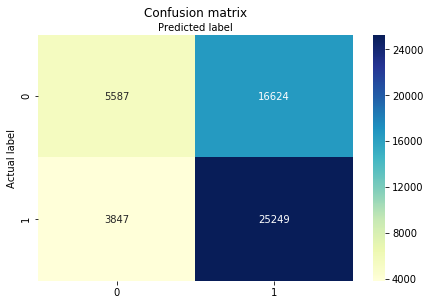

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [145]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6010096088253065
Precision: 0.6029899935519308
Recall: 0.8677825130602145


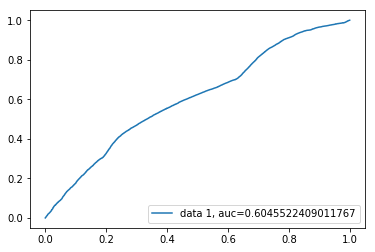

In [146]:
y_pred_proba = logistic_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

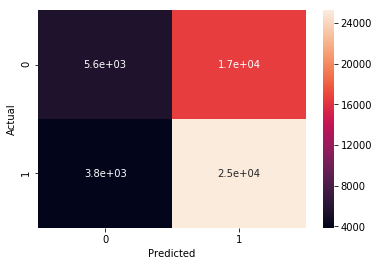

In [147]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [148]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6010096088253065


In [149]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(8, 8))
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,created_at,deadline,launched_at,goal,staff_pick,spotlight,is_starrable,blurb_count,master_category_id
created_at,1,0.984244,0.984425,0.00252667,-0.0396812,0.00269238,0.26272,-0.22196,0.0256546
deadline,0.984244,1,0.999882,0.00321108,-0.0324116,0.00420658,0.270774,-0.221982,0.0239038
launched_at,0.984425,0.999882,1,0.00273739,-0.0319384,0.00702972,0.269244,-0.222286,0.0239543
goal,0.00252667,0.00321108,0.00273739,1,-0.00449445,-0.0341721,0.00465507,-0.00177609,-0.00741939
staff_pick,-0.0396812,-0.0324116,-0.0319384,-0.00449445,1,0.244541,-0.0302613,-6.11889e-05,0.0302227
spotlight,0.00269238,0.00420658,0.00702972,-0.0341721,0.244541,1,-0.211689,-0.0295802,-0.0763821
is_starrable,0.26272,0.270774,0.269244,0.00465507,-0.0302613,-0.211689,1,-0.104159,-0.0155905
blurb_count,-0.22196,-0.221982,-0.222286,-0.00177609,-6.11889e-05,-0.0295802,-0.104159,1,0.00522274
master_category_id,0.0256546,0.0239038,0.0239543,-0.00741939,0.0302227,-0.0763821,-0.0155905,0.00522274,1
